#### About Walmart
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

#### Business Problem
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

#### Data

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

User_ID: User ID
Product_ID: Product ID
Gender: Sex of User
Age: Age in bins
Occupation: Occupation(Masked)
City_Category: Category of the City (A,B,C)
StayInCurrentCityYears: Number of years stay in current city
Marital_Status: Marital Status
ProductCategory: Product Category (Masked)
Purchase: Purchase Amount


In [1]:
# Importing libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset -
df = pd.read_csv("walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [2]:
# Shape of the dataset -
df.shape

# There are around 5 lakh rows 

(550068, 10)

In [3]:
df.info()  # there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [4]:
# Checking data types -
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [5]:
# Number of unique values in each column
for i in df.columns:
  print(i, ':', df[i].nunique())

# 

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [6]:
# Describe complete dataset
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [7]:
# Lets talk about Products first.
print("unique count of PRODUCTS are\n",df['Product_ID'].value_counts())

unique count of PRODUCTS are
 P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64


In [8]:
total = df['Gender'].shape[0]
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

([<matplotlib.patches.Wedge at 0x7f8015433a30>,
 [Text(-0.785367774085001, 0.7701931312526561, 'M'),
  Text(0.7853677019743127, -0.7701932047840901, 'F')],
 [Text(-0.42838242222818235, 0.42010534431963054, '75.3%\n414259'),
  Text(0.4283823828950796, -0.42010538442768547, '24.7%\n135809')])

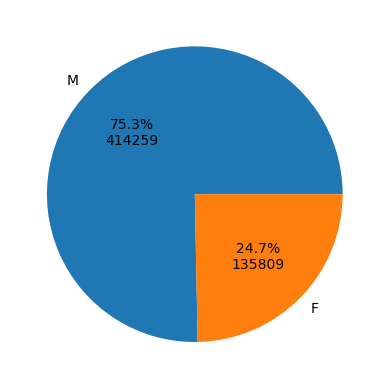

In [9]:
# gender analysis
plt.pie(df['Gender'].value_counts().values, labels=df['Gender'].value_counts().index, autopct=fmt)

**Insights**:

1. Gender Male constitutes *75.3%* of the database
2. Gender Female constitutes *24.7%* of the database

We can easily quote that Males are buying more products in black friday sale

**Recommendations**:
We need to promote products which are male oriented

([<matplotlib.patches.Wedge at 0x7f80157c9f40>,
 [Text(0.3425478155076943, 1.0453042590991901, '26-35'),
  Text(-1.0999860751865844, 0.0055348347413540725, '36-45'),
  Text(-0.406302589631829, -1.0222124073099825, '18-25'),
  Text(0.48031423239356413, -0.9895949869316141, '46-50'),
  Text(0.8836014705420766, -0.655170543641791, '51-55'),
  Text(1.0523803112495336, -0.32014946586607823, '55+'),
  Text(1.0959108835259952, -0.09475935504884372, '0-17')],
 [Text(0.18684426300419688, 0.5701659595086491, '39.9%\n219587'),
  Text(-0.5999924046472278, 0.003019000768011312, '20.0%\n110013'),
  Text(-0.221619594344634, -0.5575704039872632, '18.1%\n99660'),
  Text(0.2619895813055804, -0.5397790837808804, '8.3%\n45701'),
  Text(0.48196443847749626, -0.3573657510773405, '7.0%\n38501'),
  Text(0.5740256243179273, -0.17462698138149718, '3.9%\n21504'),
  Text(0.597769572832361, -0.05168692093573293, '2.7%\n15102')])

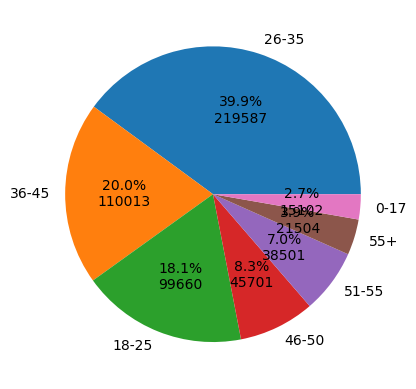

In [10]:
# Age analysis
plt.pie(df['Age'].value_counts().values, labels=df['Age'].value_counts().index, autopct=fmt)

**Insights:**
1. 0-17 is the lowest age range for shopping at walmart
2. 26-35 is the highest age range for shopping at walmart *39.9%*
3. 26-45 age range constitues mostly half *~60%* of the shopper of walmart during Black friday sale
4. 0-17 & 55+ do not have much weightage.

**Recommendation**
1. Target audience should be 26-45 years of range
2. We can also promote child categories for age group of 18-25 to grow business during Black friday sale.

In [11]:
# Occupation Analysis

df["Occupation"].unique()


array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

Text(0, 0.5, 'Frequency count')

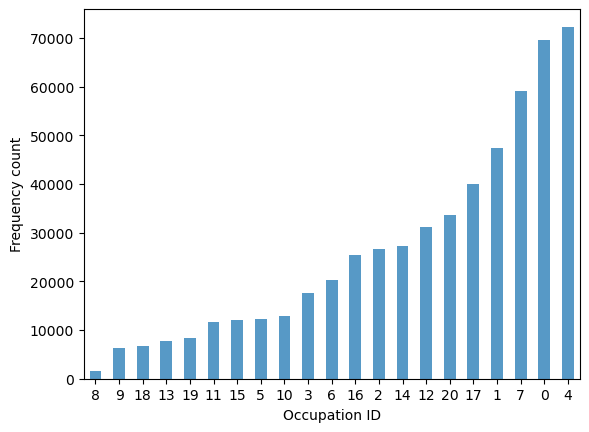

In [12]:
df['Occupation'].value_counts().sort_values().plot(kind='bar',alpha=0.75, rot=0) 
plt.xlabel("Occupation ID")
plt.ylabel("Frequency count")

**Insights**

1. Occupation id 4 has the highest frequency approximately 7k.
2. Occupation id 17,1,7,0,and 4 constitute more than half of the buyers.
3. Occupation id 8 tend to buy the least.

**Recomendation**

We should target more for Occupation id - 17 , 1 , 0 , 7 ,and 4.

([<matplotlib.patches.Wedge at 0x7f8015ce1eb0>,
 [Text(0.27267989579948126, 1.0656667745720443, 'B'),
  Text(-0.9774040218269879, -0.5046596656326213, 'C'),
  Text(0.7311976184733743, -0.8217968378734893, 'A')],
 [Text(0.14873448861789884, 0.5812727861302059, '42.0%\n231173'),
  Text(-0.5331294664510843, -0.27526890852688435, '31.1%\n171175'),
  Text(0.3988350646218405, -0.4482528206582669, '26.9%\n147720')])

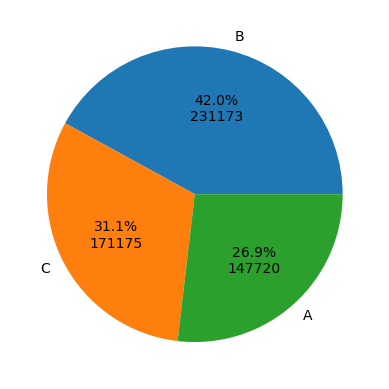

In [13]:
# City_Category analysis
plt.pie(df['City_Category'].value_counts().values, labels=df['City_Category'].value_counts().index, autopct=fmt)

**Insights**

1. All city IDs constitutes decent amount of buyers.
2. City ID B constitute most number of buyers which is 42% of the total user base.

**Recomendation**

We need to target and prioritize City A and C more so that we can equalize buying from all the cities during black friday sale.

([<matplotlib.patches.Wedge at 0x7f8015d55b80>,
 [Text(0.4921146236045687, 0.983780055314466, '1'),
  Text(-1.0347973749789408, 0.37308764752628015, '2'),
  Text(-0.7821676107334654, -0.7734428412749725, '3'),
  Text(0.2583588870847174, -1.0692290145073442, '4+'),
  Text(1.002184351502242, -0.4534606108627638, '0')],
 [Text(0.2684261583297647, 0.5366073028987995, '35.2%\n193821'),
  Text(-0.5644349318066949, 0.2035023531961528, '18.5%\n101838'),
  Text(-0.4266368785818902, -0.42187791342271225, '17.3%\n95285'),
  Text(0.14092302931893672, -0.583215826094915, '15.4%\n84726'),
  Text(0.5466460099103138, -0.24734215137968932, '13.5%\n74398')])

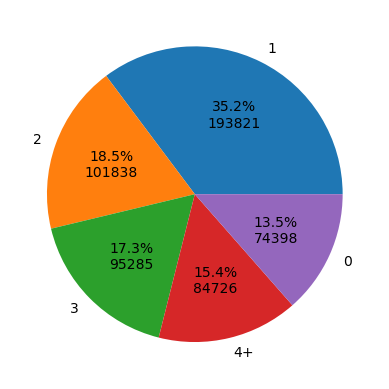

In [14]:
# Stay_In_Current_City_Years

plt.pie(df['Stay_In_Current_City_Years'].value_counts().values, labels=df['Stay_In_Current_City_Years'].value_counts().index, autopct=fmt)

**Insights**

1. 0 to 1 years of buyers staying in a particular city constitue more than half of the user base.
2. People who have stayed for more than an year tends to buy more as compared to others.
3. People who have stayed for more than 4 years are least intersted in buying.
4. From the pie-chart , we are able to deduce that people tend to reduce interst in buying after staying for 2 or more years.
5. After staying for 4+ years people tend to reduce their buying.

**Recomendation**

1. We should create awareness among people who have stayed for less than an year.
2. People with 2 or more years staying in a particular city need to be targetted with better products which might be useful to them once they have settled.

([<matplotlib.patches.Wedge at 0x7f8015dda4c0>,
 [Text(-0.30804153982647764, 1.0559878833307383, '0'),
  Text(0.30804144095775543, -1.055987912171664, '1')],
 [Text(-0.16802265808716962, 0.5759933909076753, '59.0%\n324731'),
  Text(0.16802260415877565, -0.5759934066390894, '41.0%\n225337')])

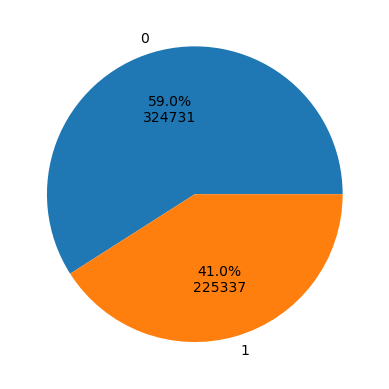

In [15]:
# Marital_Status
plt.pie(df['Marital_Status'].value_counts().values, labels=df['Marital_Status'].value_counts().index, autopct=fmt)

**Insights**

Assuming 0 to be unmarried and 1 to be married, we can clearly denote that more than half of the buyers are not married.

**Recomendation**

To increase business during black friday sale we should increase the product which target married individuals.

([<matplotlib.patches.Wedge at 0x7f8015ed7a60>,
 [Text(0.7159952330593234, 0.8350753416526712, '5'),
  Text(-0.897934430599324, 0.6353847325394812, '1'),
  Text(-0.7370040328598891, -0.8165935681526395, '8'),
  Text(0.06063841555599796, -1.0983273567378982, '11'),
  Text(0.35661139538427433, -1.040590367379057, '2'),
  Text(0.605894965855439, -0.9180911122274502, '6'),
  Text(0.8010018928307994, -0.7539203987699741, '3'),
  Text(0.9245674682849536, -0.5959656001726539, '4'),
  Text(0.9908233972636981, -0.4777750468942725, '16'),
  Text(1.0305474484438566, -0.3846712317107386, '15'),
  Text(1.054182622392725, -0.3141639677703304, '13'),
  Text(1.071364620775545, -0.24935486630597928, '10'),
  Text(1.0828408495951083, -0.1935347370580902, '12'),
  Text(1.0902755831416036, -0.14594229272296746, '7'),
  Text(1.0951471077472266, -0.10321246239134498, '18'),
  Text(1.097916615311446, -0.06766909060316025, '20'),
  Text(1.0992126812980787, -0.04161107152536206, '19'),
  Text(1.099780363316084

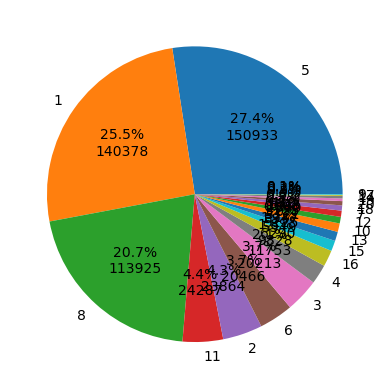

In [16]:
plt.pie(df['Product_Category'].value_counts().values, labels=df['Product_Category'].value_counts().index, autopct=fmt)

Text(0, 0.5, 'Frequency count')

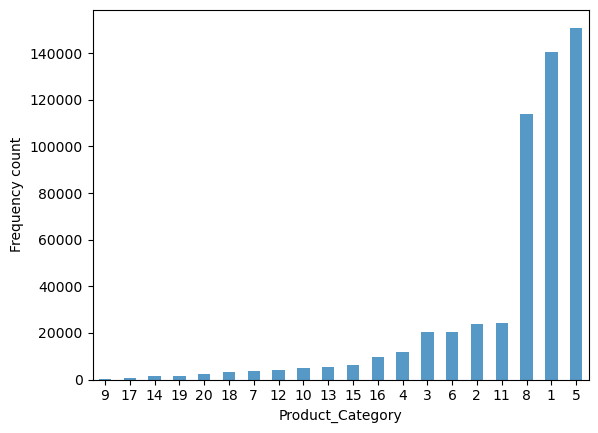

In [17]:
# Product_Category

df['Product_Category'].value_counts().sort_values().plot(kind='bar',alpha=0.75, rot=0) 
plt.xlabel("Product_Category")
plt.ylabel("Frequency count")

**Insights**

1. Product_category no 5 is the highest following with 1 and 8 which approximately constitutes more than 75% of the toal product. 

**Recomendations**

1. Most of the product category id except 1,8 and 5 need to be added with multiple products.
2. Inventory for product id 1, 8 and5 should be maintained.
3. Product ids 9 ,17, 14 ,19 ,20 18, 7, 12 , 10, 13 and 15 should be given offers so that they are frequently bought.

[]

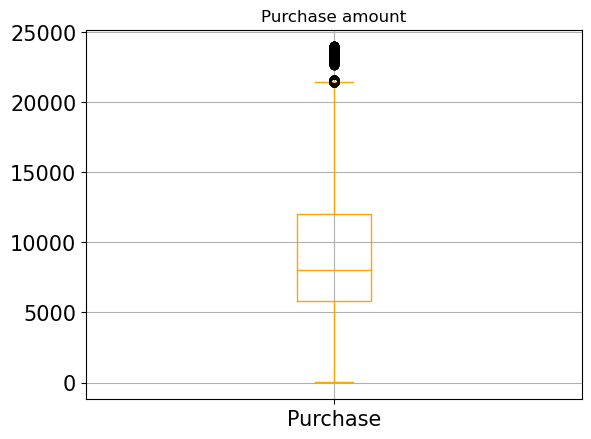

In [18]:
# For Purchase --

b_plot = df.boxplot(column = 'Purchase', color = 'orange', fontsize = 15 ) 
plt.title('Purchase amount')
b_plot.plot() 

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

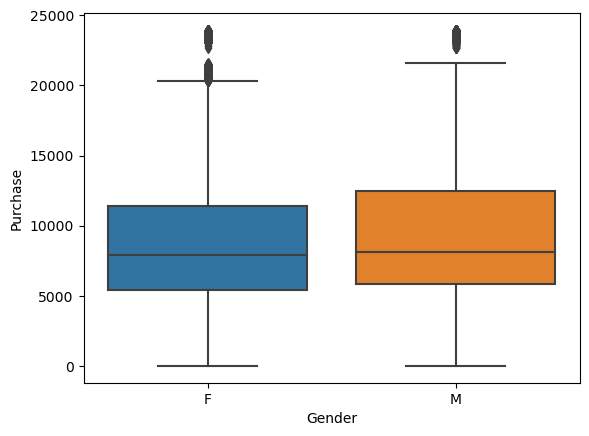

In [19]:
sns.boxplot(x=df['Gender'] , y=df['Purchase'])

**Insights**
1. Males compared to females are converting higher purchase price
2. Females on the other hand have higher outlier points above 20K
3. Males have less outlier points above 23K

<AxesSubplot:>

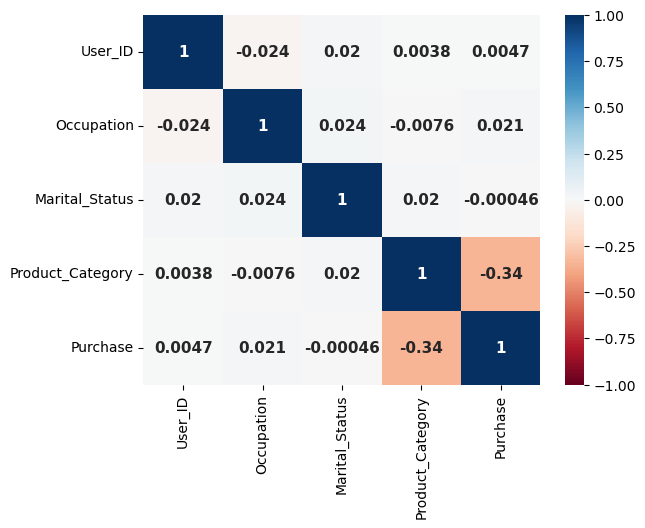

In [20]:
corr = df.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':11, 'fontweight':'bold'})

**Insights**
1. There is 34% negative correlation between Product_category and Purchase.
2. Rest of the numerical features are not correlated with each other i.e changing of one is not impacting other features values.

/Users/ankita/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


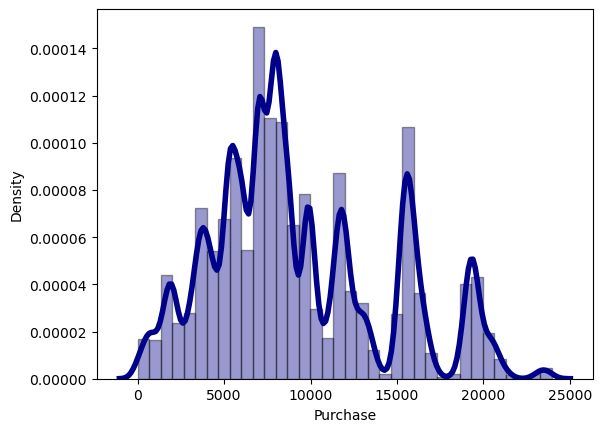

In [21]:
sns.distplot(df['Purchase'], hist=True, kde=True, 
bins=int(36), color = 'darkblue', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [22]:
# # Create boxplot
# import matplotlib
# boxplot = df.boxplot(column = 'Purchase', color = 'orange', fontsize = 15 ) 

# # Add labels to boxes
# labels = ['Median', 'Q1', 'Q3', 'Min', 'Max']
# for i in range(len(labels)):
#     y = [med.get_ydata()[0] for med in boxplot.findobj(match=matplotlib.lines.Line2D)][::2][1]
#     x = i+1
#     plt.text(x, y, labels[i], horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

# # Show plot
# plt.show()


**Insights**
1. Most of the purchases are in tha cap size of 5-12K
2. Min purchase is of 12 & Max is of 23K
3. Payments mostly above 20K are very scarce.
4. Higher density of products from our platform lies from 5-10K

**Recommendation**
1. If this is the user category that is coming to our platform we need to keep the cap size of products in this range of 5-12K
2. If the product is of more than 15k then they need to be marketed well.
3. Users of different cap size *pricing wise* should be marketed our platform for better conversion rate.

## Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

## Gender

In [23]:
df_female = df[df['Gender']=='F']
df_male = df[df['Gender']=='M']

In [24]:
df_female['Purchase'].mean()

8734.565765155476

In [25]:
df_male['Purchase'].mean()

9437.526040472265

Based on the sample mean, one could deduce that males tend to spend more on average than females. However, it is crucial to note that this conclusion is based on a single sample and may not be an accurate representation of the entire population. Therefore, to improve or confirm our estimate for the whole population, it is necessary to generate additional samples from this sample.

In [26]:
cat_col = "Gender"
display(df.groupby(cat_col)["Purchase"].agg(['mean', 'std', "median"]))

,mean,std,median
Gender,,,
F,8734.565765,4767.233289,7914.0
M,9437.526040,5092.186210,8098.0


**Using bootstrapping, we can analyze the average spending and standard deviation separately for males and females in the sample.**

/Users/ankita/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


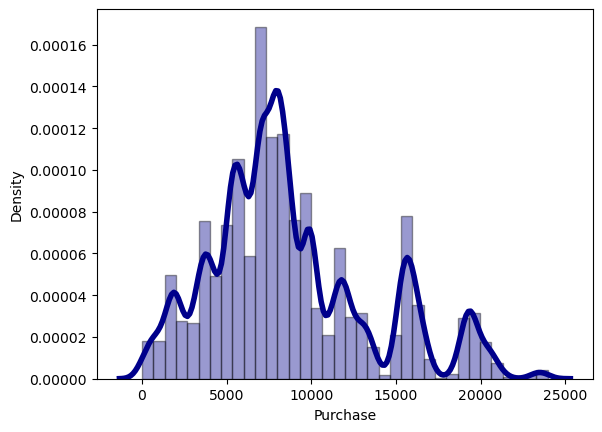

In [27]:
sns.distplot(df_female['Purchase'], hist=True, kde=True, 
bins=int(36), color = 'darkblue', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

/Users/ankita/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


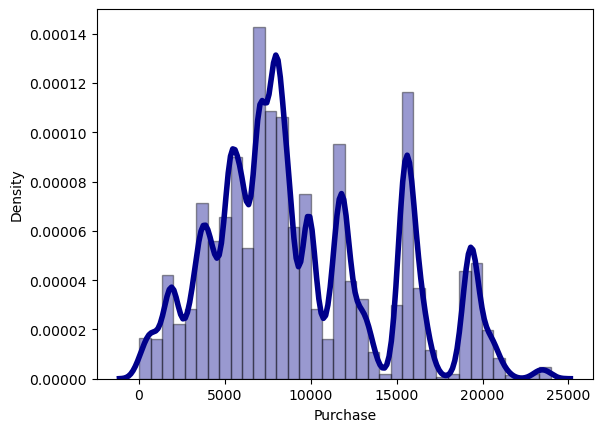

In [28]:
sns.distplot(df_male['Purchase'], hist=True, kde=True, 
bins=int(36), color = 'darkblue', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

/Users/ankita/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


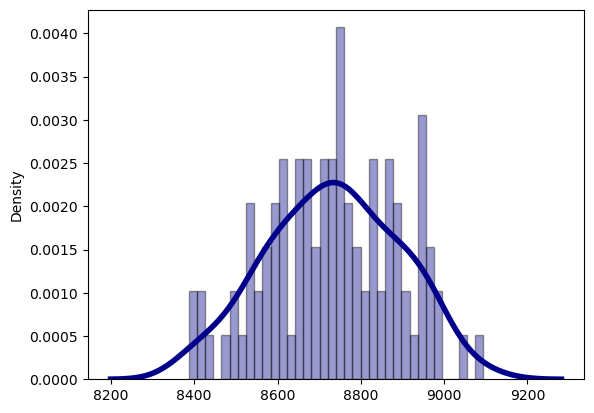

In [29]:
# For range 100 & sampling 1000
female_mean = []

for i in range(100):
    temp = df_female['Purchase'].sample(1000)
    avg = temp.mean()
    female_mean.append(avg)

sns.distplot(female_mean, hist=True, kde=True, bins=int(36), color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.show()

/Users/ankita/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


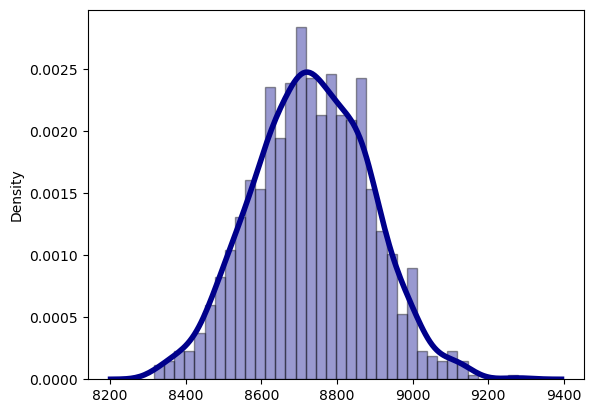

In [30]:
# For range 1000 & sampling 1000
female_mean = []

for i in range(1000):
    temp = df_female['Purchase'].sample(1000)
    avg = temp.mean()
    female_mean.append(avg)

sns.distplot(female_mean, hist=True, kde=True, bins=int(36), color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.show()

/Users/ankita/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


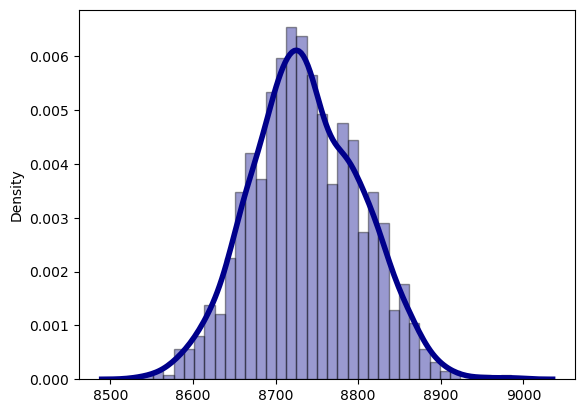

In [31]:
# For range 1000 & sampling 5000
female_mean = []

for i in range(1000):
    temp = df_female['Purchase'].sample(5000)
    avg = temp.mean()
    female_mean.append(avg)

sns.distplot(female_mean, hist=True, kde=True, bins=int(36), color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.show()

/Users/ankita/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


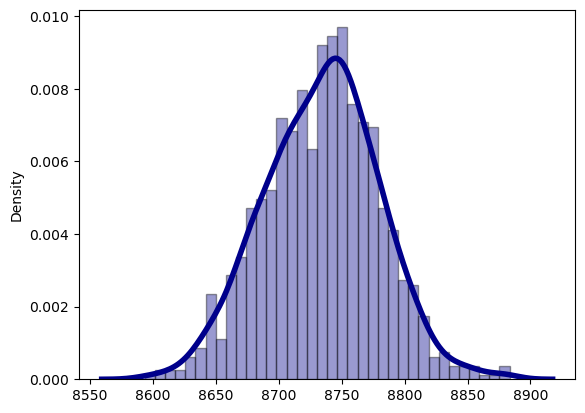

In [32]:
# For range 1000 & sampling 10000
female_mean = []

for i in range(1000):
    temp = df_female['Purchase'].sample(10000)
    avg = temp.mean()
    female_mean.append(avg)

sns.distplot(female_mean, hist=True, kde=True, bins=int(36), color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.show()

/Users/ankita/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


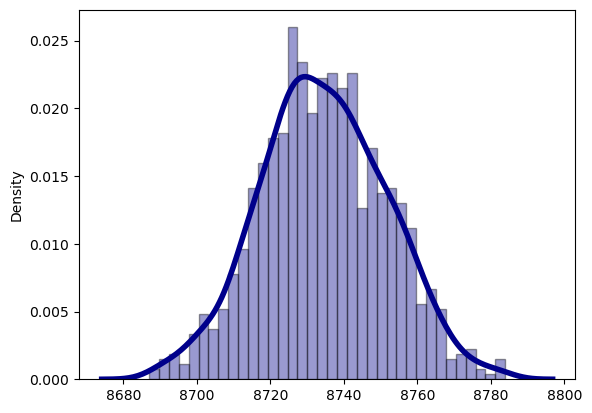

In [33]:
# For range 1000 & sampling 20000
female_mean = []

for i in range(1000):
    temp = df_female['Purchase'].sample(50000)
    avg = temp.mean()
    female_mean.append(avg)

sns.distplot(female_mean, hist=True, kde=True, bins=int(36), color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.show()

Observation - 
1. As we increase the number of times we do the sampling (for loop), the mean of the curve becomes closer to the actual population mean.
2. As we increase the count/quantity of the samples, the graph becomes thinner.

Henceforth we are keeping the for loop big enough (100000) so as to approximate to the mean of total population.

In [34]:
num_samples = 1000
samp_female = []
samp_male = []
for i in range(100000):
 female = np.random.choice(df_female['Purchase'], size=num_samples)
 male = np.random.choice(df_male['Purchase'], size=num_samples)
 samp_female.append(female.mean())
 samp_male.append(male.mean())
print("Average Spending for females: ${:.2f}, Female Average Spending Std dev: {:.2f}\n".format(np.mean(samp_female),np.std(samp_female)))
print("Average Spending for males: ${:.2f}, Male Average Spending Std dev: {:.2f}".format(np.mean(samp_male),np.std(samp_male)))

Average Spending for females: $8734.08, Female Average Spending Std dev: 150.44

Average Spending for males: $9437.30, Male Average Spending Std dev: 161.01


**Insight -**

The mean obtained through bootstrapping for both males and females is very similar to the actual sample mean.

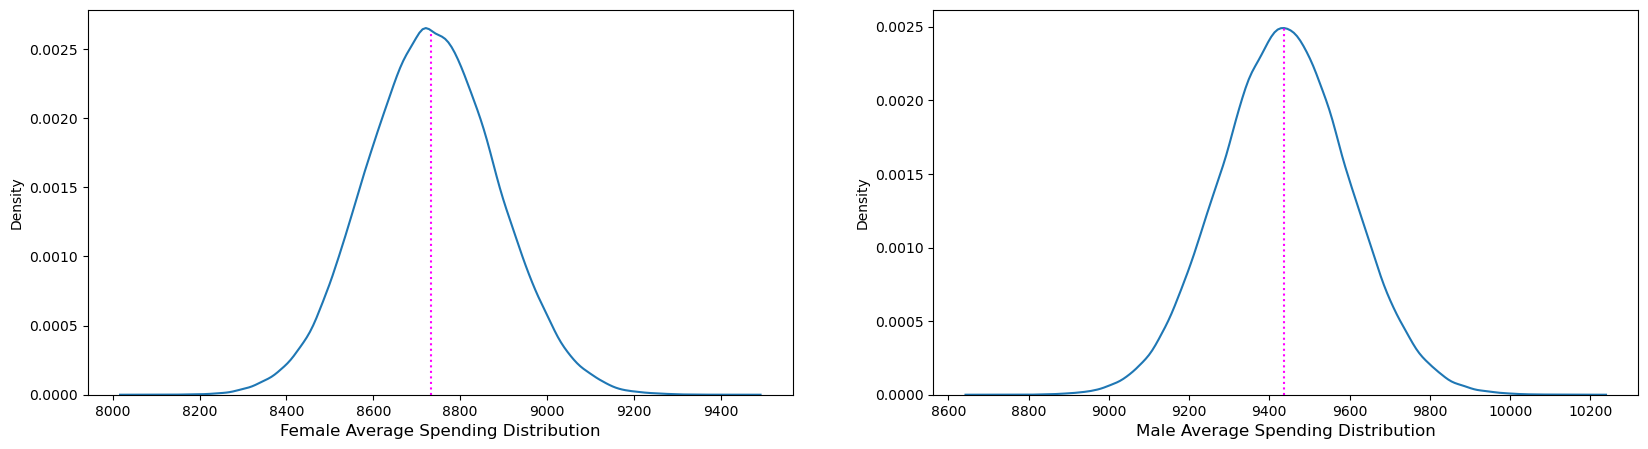

In [35]:
plt.figure(figsize=(20,5))


plt.subplot(1,2,1)
kde_female = sns.kdeplot(samp_female)
kde_female_line = kde_female.lines[0]
mean = np.mean(samp_female)
xs = kde_female_line.get_xdata()
ys = kde_female_line.get_ydata()
height = np.interp(mean, xs, ys)
kde_female.vlines(mean, 0, height, color='magenta', ls=':')
plt.xlabel("Female Average Spending Distribution", fontsize=12)


plt.subplot(1,2,2)
kde_male = sns.kdeplot(samp_male)
kde_male_line = kde_male.lines[0]
mean = np.mean(samp_male)
xs = kde_male_line.get_xdata()
ys = kde_male_line.get_ydata()
height = np.interp(mean, xs, ys)
kde_male.vlines(mean, 0, height, color='magenta', ls=':')
plt.xlabel("Male Average Spending Distribution", fontsize=12)
plt.show()

Above are graphs of the normal distribution showing the distribution of sample means for both males and females. The mean, which is approximately centered, is highlighted by a dotted line.

**Inference after computing the average female and male expenses.** -

Drawing on the bootstrapped mean analysis presented above, it can be concluded that women's average spending is not greater than that of men. One possible explanation for this is that the sample data used includes extremely high outliers for male purchases compared to female purchases. This disparity can also be observed in the density plots above, where the distribution for males is wider than that for females.

**The mean expenses of male and female customers, along with their respective confidence intervals and distributions, are presented.**

In [36]:
male_std = df_male['Purchase'].std()
print("male purchase std dev is ",male_std)

female_std = df_female['Purchase'].std()
print("female purchase std dev is ",female_std)

female_bootstrap_mean = np.mean(samp_female)
male_bootstrap_mean = np.mean(samp_male)

print("female_bootstrap_mean is ",female_bootstrap_mean)
print("male_bootstrap_mean is ",male_bootstrap_mean)

male purchase std dev is  5092.186209777949
female purchase std dev is  4767.233289291444
female_bootstrap_mean is  8734.08207418
male_bootstrap_mean is  9437.303106900003


## Lets start with 99% Confidence Interval
Female and Male 99% mean spending confidence Interval

In [37]:
female_99_Lower = female_bootstrap_mean-(2.576*female_std/np.sqrt(num_samples))
female_99_Upper = female_bootstrap_mean+(2.576*female_std/np.sqrt(num_samples))
print("Average Spending Female - 99% Confidence Interval: ${:.3f} - ${:.3f}".format(female_99_Lower, female_99_Upper))

Average Spending Female - 99% Confidence Interval: $8345.742 - $9122.422


In [38]:
male_99_Lower = male_bootstrap_mean-(2.576*male_std/np.sqrt(num_samples))
male_99_Upper = male_bootstrap_mean+(2.576*male_std/np.sqrt(num_samples))
print("Average Spending Male - 99% Confidence Interval: ${:.2f} - ${:.2f}".format(male_99_Lower, male_99_Upper))

Average Spending Male - 99% Confidence Interval: $9022.49 - $9852.11


**Insight -**

There is a some overlapping between the male and female avaerage spending henceforth we shall reduce the confidence interval.

## 95% Confidence Interval
Female and Male 95% mean spending confidence Interval

In [39]:
female_95_Lower = female_bootstrap_mean-(1.96*female_std/np.sqrt(num_samples))
female_95_Upper = female_bootstrap_mean+(1.96*female_std/np.sqrt(num_samples))
print("Average Spending Female - 95% Confidence Interval: ${:.3f} - ${:.3f}".format(female_95_Lower, female_95_Upper))

Average Spending Female - 95% Confidence Interval: $8438.606 - $9029.558


In [40]:
male_95_Lower = male_bootstrap_mean-(1.96*male_std/np.sqrt(num_samples))
male_95_Upper = male_bootstrap_mean+(1.96*male_std/np.sqrt(num_samples))
print("Average Spending Male - 95% Confidence Interval: ${:.3f} - ${:.3f}".format(male_95_Lower, male_95_Upper))

Average Spending Male - 95% Confidence Interval: $9121.686 - $9752.920


For 95% confidence Interval, there is no overlapping between the Male and Female Spending. Hence we are 95% sure that the average spending of male is more than females for total population as well. 

## 90% Confidence Interval

In [41]:
female_90_Lower = female_bootstrap_mean-(1.645*female_std/np.sqrt(num_samples))
female_90_Upper = female_bootstrap_mean+(1.645*female_std/np.sqrt(num_samples))
print("Average Spending Female - 90% Confidence Interval: ${:.2f} - ${:.2f}".format(female_90_Lower, female_90_Upper))

Average Spending Female - 90% Confidence Interval: $8486.09 - $8982.07


In [42]:
male_90_Lower = male_bootstrap_mean-(1.645*male_std/np.sqrt(num_samples))
male_90_Upper = male_bootstrap_mean+(1.645*male_std/np.sqrt(num_samples))
print("Average Spending Male - 90% Confidence Interval: ${:.2f} - ${:.2f}".format(male_90_Lower, male_90_Upper))

Average Spending Male - 90% Confidence Interval: $9172.41 - $9702.20


Since there was no overlapping for 95%, hence there is no overlapping for 90% as well.

**Insights and Recomendations.**

1. The confidence intervals above suggest that there is little overlap between male and female spending, with males spending significantly more on average. 
2. To increase female spending, Walmart should explore ways to improve their average spending. This could involve analyzing which products are driving higher spending among males and finding ways to promote similar products to females. 
3. Additionally, Walmart could introduce special offers for female buyers or provide free services, such as a kids' play area or a separate billing counter for single women shoppers, to enhance the shopping experience for women.

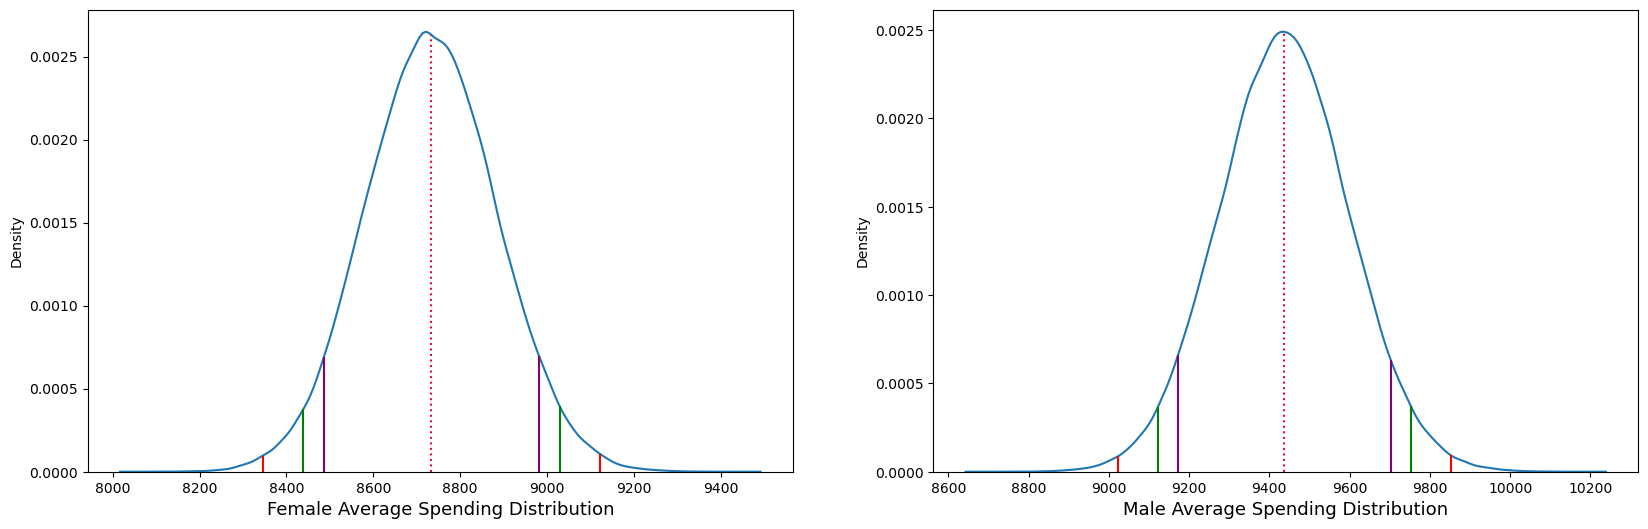

In [43]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
kde_female = sns.kdeplot(samp_female)
kde_female_line1 = kde_female.lines[0]
xs1 = kde_female_line1.get_xdata()
ys1 = kde_female_line1.get_ydata()
female_mean = np.mean(samp_female)
female_height = np.interp(female_mean, xs1, ys1)
female_height_99_l = np.interp(female_99_Lower, xs1, ys1)
female_height_99_u = np.interp(female_99_Upper, xs1, ys1)
female_height_95_l = np.interp(female_95_Lower, xs1, ys1)
female_height_95_u = np.interp(female_95_Upper, xs1, ys1)
female_height_90_l = np.interp(female_90_Lower, xs1, ys1)
female_height_90_u = np.interp(female_90_Upper, xs1, ys1)
kde_female.vlines(female_mean, 0, female_height, color='crimson', ls=':')
kde_female.vlines(female_99_Lower, 0, female_height_99_l, color='red')
kde_female.vlines(female_99_Upper, 0, female_height_99_u, color='red')
kde_female.vlines(female_95_Lower, 0, female_height_95_l, color='green')
kde_female.vlines(female_95_Upper, 0, female_height_95_u, color='green')
kde_female.vlines(female_90_Lower, 0, female_height_90_l, color='purple')
kde_female.vlines(female_90_Upper, 0, female_height_90_u, color='purple')
plt.xlabel("Female Average Spending Distribution", fontsize=13)
plt.subplot(1,2,2)
kde_male = sns.kdeplot(samp_male)
kde_male_line1 = kde_male.lines[0]
xs2 = kde_male_line1.get_xdata()
ys2 = kde_male_line1.get_ydata()
male_mean = np.mean(samp_male)
male_height = np.interp(male_mean, xs2, ys2)
male_height_99_l = np.interp(male_99_Lower, xs2, ys2)
male_height_99_u = np.interp(male_99_Upper, xs2, ys2)
male_height_95_l = np.interp(male_95_Lower, xs2, ys2)
male_height_95_u = np.interp(male_95_Upper, xs2, ys2)
male_height_90_l = np.interp(male_90_Lower, xs2, ys2)
male_height_90_u = np.interp(male_90_Upper, xs2, ys2)
kde_male.vlines(male_mean, 0, male_height, color='crimson', ls=':')
kde_male.vlines(male_99_Lower, 0, male_height_99_l, color='red')
kde_male.vlines(male_99_Upper, 0, male_height_99_u, color='red')
kde_male.vlines(male_95_Lower, 0, male_height_95_l, color='green')
kde_male.vlines(male_95_Upper, 0, male_height_95_u, color='green')
kde_male.vlines(male_90_Lower, 0, male_height_90_l, color='purple')
kde_male.vlines(male_90_Upper, 0, male_height_90_u, color='purple')
plt.xlabel("Male Average Spending Distribution", fontsize=13)
plt.show()

**The charts above display the distribution of average spending for males and females, highlighting the following:**

1. The sample mean is denoted by a dotted crimson line.
2. The 90% confidence interval is represented by purple lines.
3. The 95% confidence interval is represented by green lines.
4. The 99% confidence interval is represented by a red line.

## Marital Status

In [44]:
df_married = df[df['Marital_Status']== 1]
df_single = df[df['Marital_Status']== 0]
print("Average Spending of married : ${:.2f},Average Spending of single: ${:.2f}".format(df_married['Purchase'].mean(),df_single['Purchase'].mean()))

Average Spending of married : $9261.17,Average Spending of single: $9265.91


Bootsrapping single and married people's average spending (keeping num_samples and #iterations same as above) - 

In [45]:
num_samples = 1000
sample_married = []
sample_single = []
for i in range(100000):
 total_married = np.random.choice(df_married['Purchase'], size=num_samples)
 total_single = np.random.choice(df_single['Purchase'], size=num_samples)
 sample_married.append(total_married.mean())
 sample_single.append(total_single.mean())
print("Married Average Spend: ${:.2f}, Married Average Spend Std dev: {:.2f}\n".format(np.mean(sample_married),np.std(sample_married)))
print("Single Average Spend: ${:.2f}, Single Average Spend Std dev: {:.2f}".format(np.mean(sample_single),np.std(sample_single)))

Married Average Spend: $9261.66, Married Average Spend Std dev: 158.61

Single Average Spend: $9266.07, Single Average Spend Std dev: 159.16


In [46]:
married_std = df_married['Purchase'].std()
married_std
single_std = df_single['Purchase'].std()
single_std
married_bootstrap_mean = np.mean(sample_married)
single_bootstrap_mean = np.mean(sample_single)
married_90_Lower = married_bootstrap_mean-(1.645*married_std/np.sqrt(num_samples))
married_90_Upper = married_bootstrap_mean+(1.645*married_std/np.sqrt(num_samples))
print("Average Spending for married with 90% Confidence Interval is: ${:.2f} - ${:.2f}".format(married_90_Lower, married_90_Upper))
single_90_Lower = single_bootstrap_mean-(1.645*single_std/np.sqrt(num_samples))
single_90_Upper = single_bootstrap_mean+(1.645*single_std/np.sqrt(num_samples))
print("Average Spending for single with 90% Confidence Interval is: ${:.2f} - ${:.2f}\n".format(single_90_Lower, single_90_Upper))
married_95_Lower = married_bootstrap_mean-(1.96*married_std/np.sqrt(num_samples))
married_95_Upper = married_bootstrap_mean+(1.96*married_std/np.sqrt(num_samples))
print("Average Spending for married with 95% Confidence Interval is: ${:.2f} - ${:.2f}".format(married_95_Lower, married_95_Upper))
single_95_Lower = single_bootstrap_mean-(1.96*single_std/np.sqrt(num_samples))
single_95_Upper = single_bootstrap_mean+(1.96*single_std/np.sqrt(num_samples))
print("Average Spending for single with 95% Confidence Interval is: ${:.2f} - ${:.2f}\n".format(single_95_Lower, single_95_Upper))
married_99_Lower = married_bootstrap_mean-(2.576*married_std/np.sqrt(num_samples))
married_99_Upper = married_bootstrap_mean+(2.576*married_std/np.sqrt(num_samples))
print("Average Spending for married with 99% Confidence Interval is: ${:.2f} - ${:.2f}".format(married_99_Lower, married_99_Upper))
single_99_Lower = single_bootstrap_mean-(2.576*single_std/np.sqrt(num_samples))
single_99_Upper = single_bootstrap_mean+(2.576*single_std/np.sqrt(num_samples))
print("Average Spending for single with 99% Confidence Interval is: ${:.2f} - ${:.2f}".format(single_99_Lower, single_99_Upper))

Average Spending for married with 90% Confidence Interval is: $9000.68 - $9522.63
Average Spending for single with 90% Confidence Interval is: $9004.55 - $9527.59

Average Spending for married with 95% Confidence Interval is: $8950.70 - $9572.61
Average Spending for single with 95% Confidence Interval is: $8954.47 - $9577.67

Average Spending for married with 99% Confidence Interval is: $8852.98 - $9670.33
Average Spending for single with 99% Confidence Interval is: $8856.54 - $9675.60


**Insights**

The analysis and confidence intervals suggest that there is little difference between the average spending of married and single individuals, with their spending patterns overlapping significantly. 
Therefore, it can be concluded that a person's marital status has limited influence on their average spending behavior.

## Age

In [47]:
age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55','55+']
for age in age_groups:
 print("{} Age Group has an Average Spending of ${:.2f}".format(age, df[df["Age"]==age]['Purchase'].mean()))

0-17 Age Group has an Average Spending of $8933.46
18-25 Age Group has an Average Spending of $9169.66
26-35 Age Group has an Average Spending of $9252.69
36-45 Age Group has an Average Spending of $9331.35
46-50 Age Group has an Average Spending of $9208.63
51-55 Age Group has an Average Spending of $9534.81
55+ Age Group has an Average Spending of $9336.28


In [ ]:
n = 500
sample_age_grp = {}
for age in age_groups:
    mean_lst = []

    for i in range(5000):
        sample = np.random.choice(df[df["Age"]==age]["Purchase"], size=n)
        mean_lst.append(sample.mean())
        sample_age_grp[age] = mean_lst
print("{} Age Group Average Spend: ${:.2f}, {} Age Group Average Spend Std dev: {:.2f}\n".format(age, np.mean(mean_lst), age, np.std(mean_1st)))